In [664]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor

In [665]:
# Veri kümesinin yüklenmesi
df = pd.read_csv("/Users/sinemsen/Desktop/Duzenlenmis Data.csv")
# Yüklenen veri setinin gösterilmesi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          67051 non-null  int64  
 1   COMMUNITY AREA NAME            67051 non-null  object 
 2   CENSUS BLOCK                   66974 non-null  float64
 3   BUILDING TYPE                  66974 non-null  object 
 4   BUILDING_SUBTYPE               66974 non-null  object 
 5   KWH JANUARY 2010               66180 non-null  float64
 6   KWH FEBRUARY 2010              66180 non-null  float64
 7   KWH MARCH 2010                 66180 non-null  float64
 8   KWH APRIL 2010                 66180 non-null  float64
 9   KWH MAY 2010                   66180 non-null  float64
 10  KWH JUNE 2010                  66180 non-null  float64
 11  KWH JULY 2010                  66180 non-null  float64
 12  KWH AUGUST 2010                66180 non-null 

In [666]:
df['BUILDING TYPE'].unique()

array(['Residential', 'Commercial', 'Industrial', nan], dtype=object)

In [667]:
building_type_counts= df["BUILDING TYPE"].value_counts()
building_type_counts

BUILDING TYPE
Residential    49747
Commercial     17185
Industrial        42
Name: count, dtype: int64

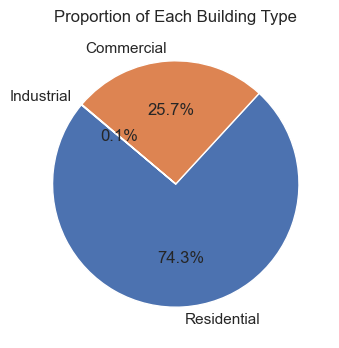

In [668]:
plt.figure(figsize=(4, 4))
plt.pie(building_type_counts, labels=building_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Building Type')
plt.show()

In [669]:
df['BUILDING_SUBTYPE'].unique()

array(['Multi < 7', 'Multi 7+', 'Commercial', 'Single Family',
       'Municipal', 'Industrial', nan], dtype=object)

In [670]:
df['BUILDING_SUBTYPE'].value_counts()

BUILDING_SUBTYPE
Multi < 7        27284
Single Family    26366
Commercial        7775
Multi 7+          5225
Municipal          282
Industrial          42
Name: count, dtype: int64

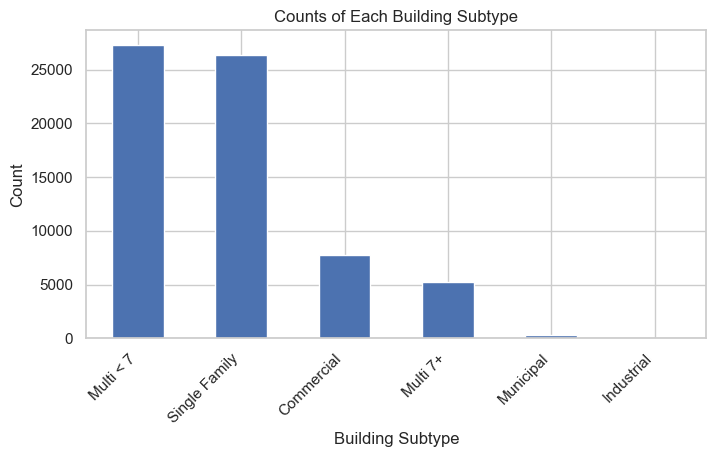

In [671]:
#plotting counts of each building subtypes.
plt.figure(figsize=(8, 4))
df['BUILDING_SUBTYPE'].value_counts().plot(kind='bar')
plt.title('Counts of Each Building Subtype')
plt.xlabel('Building Subtype')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [672]:
# 'BUILDING TYPE' ve 'BUILDING SUBTYPE' sütunlarını gruplayarak her bir bina türü için alt türlerin sayısını hesaplar.
building_type_subtypes = df.groupby('BUILDING TYPE')['BUILDING_SUBTYPE'].value_counts()

for building_type in building_type_subtypes.index.levels[0]:
    sorted_subtypes = building_type_subtypes[building_type].sort_values
    print(f"{building_type}:\n{sorted_subtypes}\n")

Commercial:
<bound method Series.sort_values of BUILDING_SUBTYPE
Commercial       7775
Multi < 7        6731
Multi 7+         2396
Municipal         282
Single Family       1
Name: count, dtype: int64>

Industrial:
<bound method Series.sort_values of BUILDING_SUBTYPE
Industrial    42
Name: count, dtype: int64>

Residential:
<bound method Series.sort_values of BUILDING_SUBTYPE
Single Family    26365
Multi < 7        20553
Multi 7+          2829
Name: count, dtype: int64>



<Figure size 1400x800 with 0 Axes>

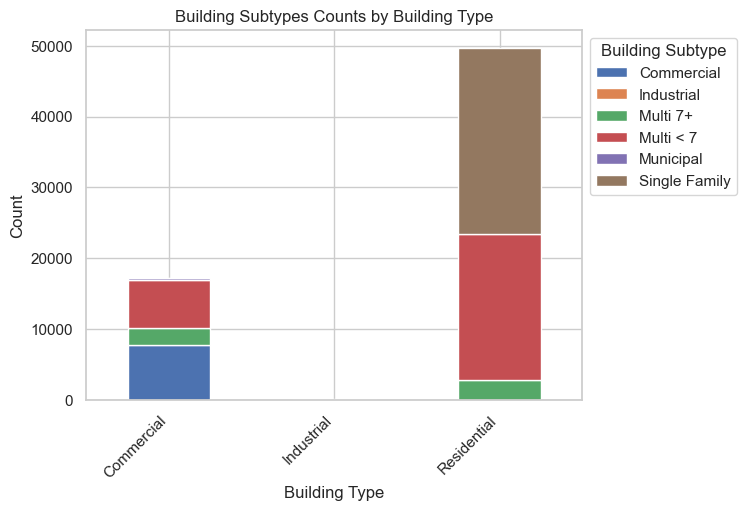

In [673]:
building_type_subtypes = df.groupby('BUILDING TYPE')['BUILDING_SUBTYPE'].value_counts().unstack()

plt.figure(figsize=(14, 8))
building_type_subtypes.plot(kind='bar', stacked=True)
plt.title('Building Subtypes Counts by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Building Subtype', bbox_to_anchor=(1, 1))
plt.show()

In [674]:
# Veri setini inceleyip data hakkında bilgi ediniyoruz.

# Veri setinin ilk 3 satırını görüntüle.
print(df.head(3))
# Veri setinin son 3 satırını görüntüle.
print(df.tail(3))
# Veri setindeki toplam satır sayısını hesapla ve görüntüle.
len(df)
# Veri setindeki sütunların veri tiplerini görüntüle.
df.dtypes


   index COMMUNITY AREA NAME  CENSUS BLOCK BUILDING TYPE BUILDING_SUBTYPE  \
0      0      Archer Heights  1.703160e+14   Residential        Multi < 7   
1      1             Ashburn  1.703170e+14   Residential         Multi 7+   
2      2      Auburn Gresham  1.703170e+14    Commercial        Multi < 7   

   KWH JANUARY 2010  KWH FEBRUARY 2010  KWH MARCH 2010  KWH APRIL 2010  \
0               NaN                NaN             NaN             NaN   
1            7334.0             7741.0          4214.0          4284.0   
2               NaN                NaN             NaN             NaN   

   KWH MAY 2010  ...  ZERO KWH ACCOUNTS  KWH MEAN 2010  TOTAL POPULATION  \
0           NaN  ...                  0            NaN              89.0   
1        2518.0  ...                  3       27354.67             112.0   
2           NaN  ...                  7            NaN             102.0   

   TOTAL UNITS  AVERAGE STORIES  AVERAGE BUILDING AGE  AVERAGE HOUSESIZE  \
0         24.

index                              int64
COMMUNITY AREA NAME               object
CENSUS BLOCK                     float64
BUILDING TYPE                     object
BUILDING_SUBTYPE                  object
KWH JANUARY 2010                 float64
KWH FEBRUARY 2010                float64
KWH MARCH 2010                   float64
KWH APRIL 2010                   float64
KWH MAY 2010                     float64
KWH JUNE 2010                    float64
KWH JULY 2010                    float64
KWH AUGUST 2010                  float64
KWH SEPTEMBER 2010               float64
KWH OCTOBER 2010                 float64
KWH NOVEMBER 2010                float64
KWH DECEMBER 2010                float64
TOTAL KWH                        float64
ELECTRICITY ACCOUNTS              object
ZERO KWH ACCOUNTS                  int64
KWH MEAN 2010                    float64
TOTAL POPULATION                 float64
TOTAL UNITS                      float64
AVERAGE STORIES                  float64
AVERAGE BUILDING

In [675]:
# Veri setindeki sayısal sütunlar için temel istatistiksel bilgileri görüntüle (count, mean, std, min, 25%, 50%, 75%, max).
print("\nSTATISTICAL SUMMARY FOR NUMERIC COLUMNS")
print(df.describe())



STATISTICAL SUMMARY FOR NUMERIC COLUMNS
              index  CENSUS BLOCK  KWH JANUARY 2010  KWH FEBRUARY 2010  \
count  67051.000000  6.697400e+04      6.618000e+04       6.618000e+04   
mean   33525.000000  1.703140e+14      1.758159e+04       1.737651e+04   
std    19356.100787  2.715274e+09      3.482508e+05       3.351910e+05   
min        0.000000  1.703100e+14      0.000000e+00       0.000000e+00   
25%    16762.500000  1.703120e+14      1.370000e+03       1.613000e+03   
50%    33525.000000  1.703130e+14      3.481500e+03       3.814000e+03   
75%    50287.500000  1.703170e+14      7.157000e+03       7.410250e+03   
max    67050.000000  1.703200e+14      5.298534e+07       4.787976e+07   

       KWH MARCH 2010  KWH APRIL 2010  KWH MAY 2010  KWH JUNE 2010  \
count    6.618000e+04    6.618000e+04  6.618000e+04   6.618000e+04   
mean     1.624212e+04    1.595696e+04  1.906623e+04   2.300485e+04   
std      3.164713e+05    3.118232e+05  3.634429e+05   3.988582e+05   
min      0.0

In [676]:
print("\nDATA INFORMATION")
print(df.info())

print("\n\nVeri setinin boyutu:", df.shape)

print("\nSütun isimleri:\n\n", df.columns.tolist())

print("\n\nEksik veri sayısı:\n\n", df.isnull().sum())


DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          67051 non-null  int64  
 1   COMMUNITY AREA NAME            67051 non-null  object 
 2   CENSUS BLOCK                   66974 non-null  float64
 3   BUILDING TYPE                  66974 non-null  object 
 4   BUILDING_SUBTYPE               66974 non-null  object 
 5   KWH JANUARY 2010               66180 non-null  float64
 6   KWH FEBRUARY 2010              66180 non-null  float64
 7   KWH MARCH 2010                 66180 non-null  float64
 8   KWH APRIL 2010                 66180 non-null  float64
 9   KWH MAY 2010                   66180 non-null  float64
 10  KWH JUNE 2010                  66180 non-null  float64
 11  KWH JULY 2010                  66180 non-null  float64
 12  KWH AUGUST 2010             

In [677]:
null_counts = df.isnull().sum()
null_counts

index                               0
COMMUNITY AREA NAME                 0
CENSUS BLOCK                       77
BUILDING TYPE                      77
BUILDING_SUBTYPE                   77
KWH JANUARY 2010                  871
KWH FEBRUARY 2010                 871
KWH MARCH 2010                    871
KWH APRIL 2010                    871
KWH MAY 2010                      871
KWH JUNE 2010                     871
KWH JULY 2010                     871
KWH AUGUST 2010                   871
KWH SEPTEMBER 2010                871
KWH OCTOBER 2010                  871
KWH NOVEMBER 2010                 871
KWH DECEMBER 2010                 871
TOTAL KWH                         871
ELECTRICITY ACCOUNTS              871
ZERO KWH ACCOUNTS                   0
KWH MEAN 2010                     871
TOTAL POPULATION                   14
TOTAL UNITS                        14
AVERAGE STORIES                     0
AVERAGE BUILDING AGE                0
AVERAGE HOUSESIZE                  14
OCCUPIED UNI

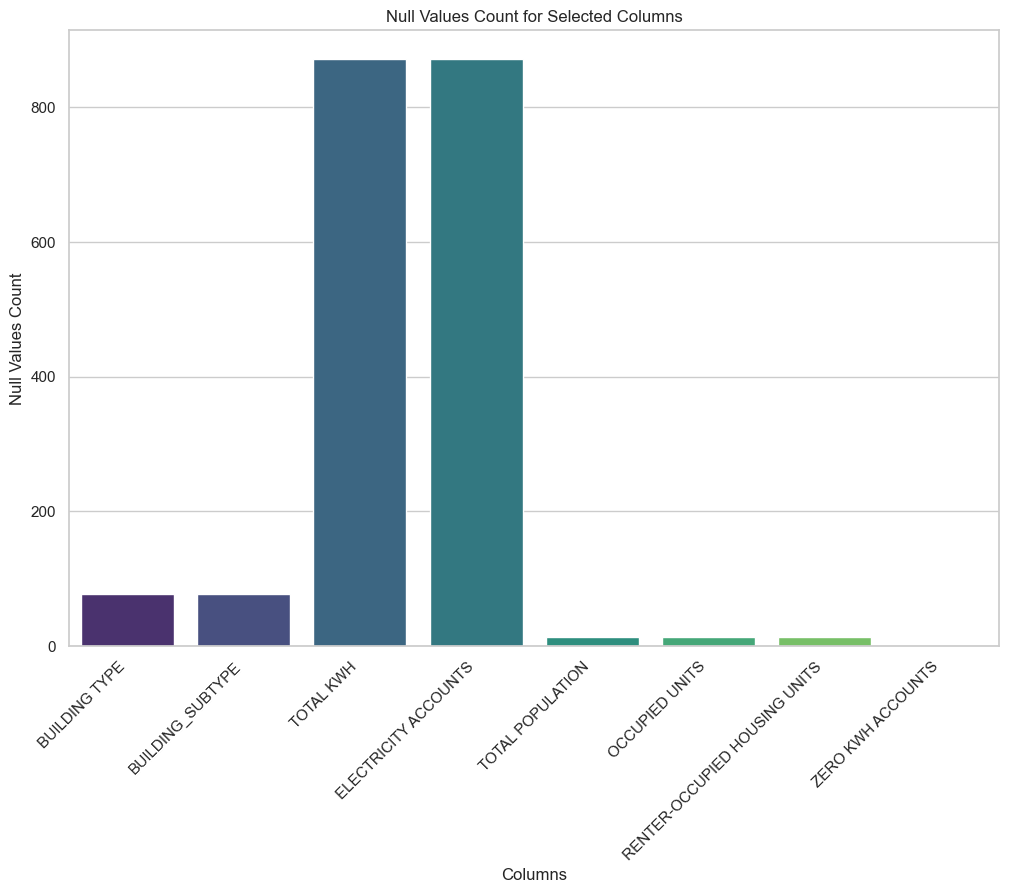

In [678]:
columns_to_remove_nulls = ['BUILDING TYPE', 'BUILDING_SUBTYPE', 'TOTAL KWH', 'ELECTRICITY ACCOUNTS',
                    'TOTAL POPULATION', 'OCCUPIED UNITS', 'RENTER-OCCUPIED HOUSING UNITS', 'ZERO KWH ACCOUNTS']

null_counts = df[columns_to_remove_nulls].isnull().sum()

plt.figure(figsize=(12, 8))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.title('Null Values Count for Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

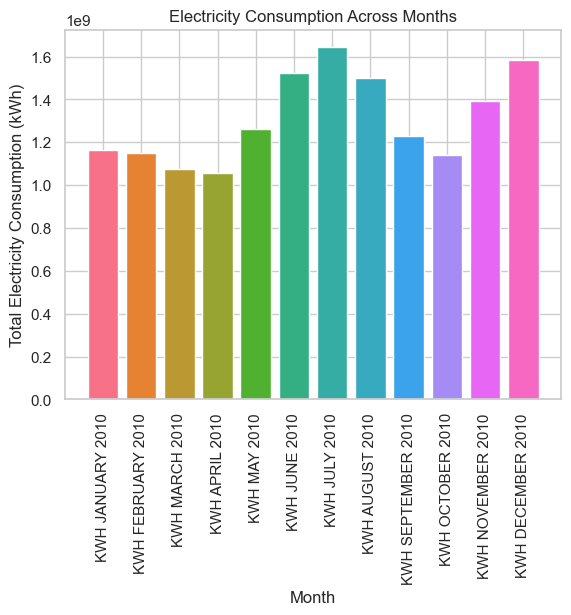

In [679]:
monthly_kwh_columns = ['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010']

monthly_consumption = df[monthly_kwh_columns].sum()


sns.set(style="whitegrid")  
palette = sns.color_palette("husl", len(monthly_consumption))

plt.bar(monthly_consumption.index, monthly_consumption.values, color=palette)
plt.xlabel('Month')
plt.ylabel('Total Electricity Consumption (kWh)')
plt.title('Electricity Consumption Across Months')
plt.xticks(rotation=90)
plt.show()

In [680]:
# Veri setini temizleme
df = df.drop(columns= ["CENSUS BLOCK", "KWH MEAN 2010", "RENTER-OCCUPIED HOUSING UNITS"], axis=1)
df.head(3)

,index,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE
0,0,Archer Heights,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,89.0,24.0,2.0,71.33,3.87,23.0,0.9582
1,1,Ashburn,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,82064.0,8,3,112.0,67.0,2.0,41.00,1.81,62.0,0.9254
2,2,Auburn Gresham,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7,102.0,48.0,3.0,86.00,3.00,34.0,0.7082


In [681]:
df.dropna(inplace=True)
#print("\n\nEksik veri sayısı:\n\n", df.isnull().sum())
print(df)

       index COMMUNITY AREA NAME BUILDING TYPE BUILDING_SUBTYPE  \
1          1             Ashburn   Residential         Multi 7+   
5          5              Austin    Commercial       Commercial   
7          7              Austin    Commercial        Multi < 7   
8          8              Austin   Residential         Multi 7+   
9          9              Austin   Residential         Multi 7+   
...      ...                 ...           ...              ...   
67045  67045            Woodlawn   Residential        Multi < 7   
67046  67046            Woodlawn   Residential    Single Family   
67047  67047            Woodlawn    Commercial        Multi < 7   
67048  67048            Woodlawn   Residential        Multi < 7   
67050  67050            Woodlawn   Residential        Multi < 7   

       KWH JANUARY 2010  KWH FEBRUARY 2010  KWH MARCH 2010  KWH APRIL 2010  \
1                7334.0             7741.0          4214.0          4284.0   
5                   0.0                

In [682]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63769 entries, 1 to 67050
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      63769 non-null  int64  
 1   COMMUNITY AREA NAME        63769 non-null  object 
 2   BUILDING TYPE              63769 non-null  object 
 3   BUILDING_SUBTYPE           63769 non-null  object 
 4   KWH JANUARY 2010           63769 non-null  float64
 5   KWH FEBRUARY 2010          63769 non-null  float64
 6   KWH MARCH 2010             63769 non-null  float64
 7   KWH APRIL 2010             63769 non-null  float64
 8   KWH MAY 2010               63769 non-null  float64
 9   KWH JUNE 2010              63769 non-null  float64
 10  KWH JULY 2010              63769 non-null  float64
 11  KWH AUGUST 2010            63769 non-null  float64
 12  KWH SEPTEMBER 2010         63769 non-null  float64
 13  KWH OCTOBER 2010           63769 non-null  float64


In [683]:
# Kategorik değişkenleri tespit edelim.

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"Kategorik Sütunlar: {categorical_columns}")

Kategorik Sütunlar: ['COMMUNITY AREA NAME', 'BUILDING TYPE', 'BUILDING_SUBTYPE', 'ELECTRICITY ACCOUNTS']


In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63769 entries, 1 to 67050
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      63769 non-null  int64  
 1   COMMUNITY AREA NAME        63769 non-null  object 
 2   BUILDING TYPE              63769 non-null  object 
 3   BUILDING_SUBTYPE           63769 non-null  object 
 4   KWH JANUARY 2010           63769 non-null  float64
 5   KWH FEBRUARY 2010          63769 non-null  float64
 6   KWH MARCH 2010             63769 non-null  float64
 7   KWH APRIL 2010             63769 non-null  float64
 8   KWH MAY 2010               63769 non-null  float64
 9   KWH JUNE 2010              63769 non-null  float64
 10  KWH JULY 2010              63769 non-null  float64
 11  KWH AUGUST 2010            63769 non-null  float64
 12  KWH SEPTEMBER 2010         63769 non-null  float64
 13  KWH OCTOBER 2010           63769 non-null  float64


In [685]:
# Kategorik verileri sayısal verilere dönüştürelim.

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
print(df)

       index  COMMUNITY AREA NAME  BUILDING TYPE  BUILDING_SUBTYPE  \
1          1                    3              2                 2   
5          5                    5              0                 0   
7          7                    5              0                 3   
8          8                    5              2                 2   
9          9                    5              2                 2   
...      ...                  ...            ...               ...   
67045  67045                   76              2                 3   
67046  67046                   76              2                 5   
67047  67047                   76              0                 3   
67048  67048                   76              2                 3   
67050  67050                   76              2                 3   

       KWH JANUARY 2010  KWH FEBRUARY 2010  KWH MARCH 2010  KWH APRIL 2010  \
1                7334.0             7741.0          4214.0          4284.0   
5  

In [686]:
df

,index,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE
1,1,3,2,2,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,82064.0,293,3,112.0,67.0,2.00,41.00,1.81,62.0,0.9254
5,5,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1994.0,317,1,54.0,18.0,2.00,131.00,3.00,18.0,1.0000
7,7,5,0,3,1470.0,1325.0,294.0,391.0,366.0,2204.0,...,13423.0,317,3,64.0,63.0,2.00,131.00,1.02,59.0,0.9365
8,8,5,2,2,2461.0,4888.0,2893.0,2737.0,2350.0,3037.0,...,41497.0,257,0,79.0,31.0,3.00,99.00,2.93,27.0,0.8710
9,9,5,2,2,0.0,0.0,0.0,0.0,0.0,511.0,...,8596.0,317,0,84.0,33.0,3.00,99.00,3.82,22.0,0.6667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67045,67045,76,2,3,9572.0,9104.0,8525.0,7756.0,11256.0,11669.0,...,139240.0,111,18,116.0,55.0,2.00,51.90,3.14,37.0,0.6727
67046,67046,76,2,5,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,...,27654.0,257,7,116.0,55.0,1.00,0.00,3.14,37.0,0.6727
67047,67047,76,0,3,1005.0,1760.0,1521.0,1832.0,2272.0,2361.0,...,41977.0,305,5,31.0,24.0,3.00,104.50,2.07,15.0,0.6250
67048,67048,76,2,3,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,...,48850.0,276,2,31.0,24.0,2.33,100.67,2.07,15.0,0.6250


In [687]:
# LOF algoritması ile aykırı değerlerin tespiti
lof = LocalOutlierFactor()
outliers = lof.fit_predict(df)
df["KWH JUNE 2010"]

1         4273.0
5            0.0
7         2204.0
8         3037.0
9          511.0
          ...   
67045    11669.0
67046     2990.0
67047     2361.0
67048     4987.0
67050     5383.0
Name: KWH JUNE 2010, Length: 63769, dtype: float64

In [688]:

# Aykırı değerlerin indekslerini görüntüle

print("Aykırı Değerlerin İndeksleri:")
print("\n")
outliers[:100]

Aykırı Değerlerin İndeksleri:




array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1])

In [689]:

# Tüm sütunları döngüye almadan önce numerik sütunları seçelim
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Her bir sütun için aykırı değerleri düzeltme işlemini gerçekleştirelim

for col in numeric_columns:
    q75, q25 = np.percentile(df[col], [75, 25])
    intr_qr = q75 - q25

    max_val = q75 + (1.5 * intr_qr)
    min_val = q25 - (1.5 * intr_qr)

    df[col] = df[col].apply(lambda x: np.nan if x < min_val or x > max_val else x)


In [690]:
print("\n\nOutlier sayısı:\n\n", df.isnull().sum())
         



Outlier sayısı:

 index                            0
COMMUNITY AREA NAME              0
BUILDING TYPE                15108
BUILDING_SUBTYPE                 0
KWH JANUARY 2010              3688
KWH FEBRUARY 2010             3542
KWH MARCH 2010                3528
KWH APRIL 2010                3586
KWH MAY 2010                  3679
KWH JUNE 2010                 3497
KWH JULY 2010                 3207
KWH AUGUST 2010               3378
KWH SEPTEMBER 2010            3729
KWH OCTOBER 2010              3657
KWH NOVEMBER 2010             3366
KWH DECEMBER 2010             3319
TOTAL KWH                     3286
ELECTRICITY ACCOUNTS             0
ZERO KWH ACCOUNTS             6169
TOTAL POPULATION              3530
TOTAL UNITS                   4735
AVERAGE STORIES               1248
AVERAGE BUILDING AGE             0
AVERAGE HOUSESIZE              953
OCCUPIED UNITS                4597
OCCUPIED UNITS PERCENTAGE     3114
dtype: int64


In [691]:
# Building type içindeki nan değerleri sildik
df.dropna(inplace=True)
print("\n\nOutlier sayısı:\n\n", df.isnull().sum())
df.info()



Outlier sayısı:

 index                        0
COMMUNITY AREA NAME          0
BUILDING TYPE                0
BUILDING_SUBTYPE             0
KWH JANUARY 2010             0
KWH FEBRUARY 2010            0
KWH MARCH 2010               0
KWH APRIL 2010               0
KWH MAY 2010                 0
KWH JUNE 2010                0
KWH JULY 2010                0
KWH AUGUST 2010              0
KWH SEPTEMBER 2010           0
KWH OCTOBER 2010             0
KWH NOVEMBER 2010            0
KWH DECEMBER 2010            0
TOTAL KWH                    0
ELECTRICITY ACCOUNTS         0
ZERO KWH ACCOUNTS            0
TOTAL POPULATION             0
TOTAL UNITS                  0
AVERAGE STORIES              0
AVERAGE BUILDING AGE         0
AVERAGE HOUSESIZE            0
OCCUPIED UNITS               0
OCCUPIED UNITS PERCENTAGE    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 37307 entries, 1 to 67046
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
-

In [692]:
"""
# nan değerleri yani outlier değerleri mean ile dolduruyoruz


for col in df.columns:
    df[col].fillna(df[col].mean(), inplace=True)
"""

'\n# nan değerleri yani outlier değerleri mean ile dolduruyoruz\n\n\nfor col in df.columns:\n    df[col].fillna(df[col].mean(), inplace=True)\n'

In [693]:
"""
summ = 0
for index, row in df.iterrows():
    for j in df.columns[3:15]:  # 15. sütun dahil olsun
        summ += row[j]
    df.loc[index, "TOTAL KWH"] = summ
    summ = 0  # her döngü sonunda sıfırla
df
"""

'\nsumm = 0\nfor index, row in df.iterrows():\n    for j in df.columns[3:15]:  # 15. sütun dahil olsun\n        summ += row[j]\n    df.loc[index, "TOTAL KWH"] = summ\n    summ = 0  # her döngü sonunda sıfırla\ndf\n'

In [694]:
"""
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

df = pd.DataFrame(X_scaled, columns=df.columns)
df
"""

'\nscaler = StandardScaler()\n\nX_scaled = scaler.fit_transform(df)\n\ndf = pd.DataFrame(X_scaled, columns=df.columns)\ndf\n'

In [695]:
df.corr()

,index,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE
index,1.000000,0.984860,NaN,-0.004464,-0.063677,-0.051196,-0.056303,-0.048466,-0.042079,-0.048668,...,-0.059482,0.041417,0.041758,-0.040552,0.019749,0.050614,0.022617,-0.078742,0.014721,-0.044501
COMMUNITY AREA NAME,0.984860,1.000000,NaN,-0.014000,-0.072041,-0.060958,-0.067476,-0.058701,-0.051786,-0.058102,...,-0.070447,0.049830,0.036884,-0.045108,0.015936,0.057261,0.014486,-0.077640,0.010374,-0.048294
BUILDING TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING_SUBTYPE,-0.004464,-0.014000,NaN,1.000000,0.294485,0.295432,0.284433,0.298794,0.316483,0.326431,...,0.312553,-0.114363,-0.372947,-0.125380,-0.186532,-0.707488,-0.159217,0.099765,-0.180760,0.095426
KWH JANUARY 2010,-0.063677,-0.072041,NaN,0.294485,1.000000,0.848690,0.785693,0.815818,0.831135,0.831559,...,0.870162,-0.520314,0.071298,0.069860,0.005088,-0.225754,-0.098939,0.077532,0.032903,0.178869
KWH FEBRUARY 2010,-0.051196,-0.060958,NaN,0.295432,0.848690,1.000000,0.893513,0.864104,0.854320,0.838386,...,0.921983,-0.558506,0.111791,0.098138,0.024513,-0.227325,-0.082090,0.093814,0.051822,0.174890
KWH MARCH 2010,-0.056303,-0.067476,NaN,0.284433,0.785693,0.893513,1.000000,0.894803,0.858623,0.830473,...,0.922364,-0.566921,0.127677,0.104584,0.029026,-0.225698,-0.076566,0.098335,0.055232,0.167915
KWH APRIL 2010,-0.048466,-0.058701,NaN,0.298794,0.815818,0.864104,0.894803,1.000000,0.908714,0.871103,...,0.940727,-0.576151,0.105078,0.075091,0.009151,-0.231993,-0.102165,0.078007,0.038053,0.187623
KWH MAY 2010,-0.042079,-0.051786,NaN,0.316483,0.831135,0.854320,0.858623,0.908714,1.000000,0.937099,...,0.947208,-0.570902,0.053208,0.040572,-0.014877,-0.241642,-0.148722,0.048225,0.019705,0.225946
KWH JUNE 2010,-0.048668,-0.058102,NaN,0.326431,0.831559,0.838386,0.830473,0.871103,0.937099,1.000000,...,0.937508,-0.566787,0.017082,0.024311,-0.028829,-0.253992,-0.169397,0.034273,0.010575,0.254274


In [696]:
X = df.drop(['TOTAL KWH'], axis=1)
y = df[['TOTAL KWH']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [697]:
base_regressor = LinearRegression()

#multioutput_regressor_lr = MultiOutputRegressor(base_regressor)

# Modeli eğitme
base_regressor.fit(X_train, y_train)

# Tahmin yapma
predictions = base_regressor.predict(X_test)

# Tahminlerin performansını değerlendirme
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 4.215829147296882e-21


In [698]:
"""
y_pred = multioutput_regressor_lr.predict(X_test)
SSE = mean_squared_error(y_test, y_pred) * len(y_test)  # SSE hesaplanması
SST = np.sum((y_test - np.mean(y_test))**2)            # SST hesaplanması
R_squared = 1 - (SSE / SST)                             # R-kare hesaplanması

print("SSE (Sum of Squares due to Error): ", SSE)
print("R-squared Score: ", R_squared)

# SSE'nin oranını kontrol etme
if SSE / SST < 0.1:  # Örnek olarak, SSE'nin SST'nin %10'undan daha az olması durumunda genelleştirilebilir
    print("Model genelleştirilebilir.")
else:
    print("Model genelleştirilemez.")
"""

SSE (Sum of Squares due to Error):  3.9321038456838014e-17
R-squared Score:  TOTAL KWH    1.0
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().